### EEG 建模(分類器)。
### 以機器學習的方法和神經網路(Neural Network)的方式。

In [1]:
# 匯入相關的套件、模組
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Get_file import Get_file   # return dirpath, dirnames, filenames
from FFT import FFT, PlotDataOnTimeDomain
from BandPassFilter import BandPassFilter, PlotDataOnFreqDomain, BandPassListFilter
from Danny_ML_CLF import Danny_ML_CLF
import os

%matplotlib inline

data_dir = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\database\\New_SDK_Data"


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 此 function 會去計算 Array中有幾個 0 的值
def CalculateZeros(NumpyArray):
    LogicWithZeros = (NumpyArray == 0)
    return np.sum(LogicWithZeros)

# 資料愈處理

### Read the data (*.csv) using pandas

In [3]:
os.chdir(data_dir)
_,data_files,_ = Get_file(data_dir)
data_files
all_df = pd.DataFrame()
for file in data_files:
    emotion = 0
    # 1->normal, 2->happy, 3->scare, 4->touch, 
    _,_,file_names = Get_file(data_dir + '\\' + file)
    for fn in file_names:
        
        data_name = data_dir + '\\' + file + '\\' + fn
        if 'happy' in fn:
            emotion = 2
        elif 'scare' in fn:
            emotion = 3
        elif 'touch' in fn:
            emotion = 4
        else:
            print(fn)
            emotion = 1
        #print(emotion, fn)
        df = pd.read_csv(data_name, engine='python')
        df_length = df.shape[0]
        
        df['label'] = df['label']*emotion
            
        try:
            all_df = pd.concat([all_df,df])
        except Exception as e:
            print(e)
            all_df = df
        #print(sorted(df.corr()['label'].tolist()), fn)
        #print('***********************************************')
        

### 移除遺失值

In [4]:
all_df = all_df.dropna(axis=1)
all_df = all_df.reset_index()

In [5]:
Columns = ['alpha', 'channel', 'gamma', 'heig_beta', 'label','low_beta','theta','time']
Features = ['alpha', 'heig_beta', 'low_beta','theta']
Labels = ['label']

### 區分每個 Channel，每個 channel都訓練，以探討頭腦哪一區塊對於情緒有較大的相關性。

In [6]:
channel1 = all_df[all_df['channel'] == 1].index
channel2 = all_df[all_df['channel'] == 2].index
channel3 = all_df[all_df['channel'] == 3].index
channel4 = all_df[all_df['channel'] == 4].index
channel5 = all_df[all_df['channel'] == 5].index
channel6 = all_df[all_df['channel'] == 6].index
channel7 = all_df[all_df['channel'] == 7].index
channel8 = all_df[all_df['channel'] == 8].index
channel9 = all_df[all_df['channel'] == 9].index
channel10 = all_df[all_df['channel'] == 10].index
channel11 = all_df[all_df['channel'] == 11].index
channel12 = all_df[all_df['channel'] == 12].index
channel13 = all_df[all_df['channel'] == 13].index
channel14 = all_df[all_df['channel'] == 14].index

df_1 = all_df.iloc[channel1]
df_2 = all_df.iloc[channel2]
df_3 = all_df.iloc[channel3]
df_4 = all_df.iloc[channel4]
df_5 = all_df.iloc[channel5]
df_6 = all_df.iloc[channel6]
df_7 = all_df.iloc[channel7]
df_8 = all_df.iloc[channel8]
df_9 = all_df.iloc[channel9]
df_10 = all_df.iloc[channel10]
df_11 = all_df.iloc[channel11]
df_12 = all_df.iloc[channel12]
df_13 = all_df.iloc[channel13]
df_14 = all_df.iloc[channel14]


In [7]:
# 利用 List 去收集每個 Pandas的 DataFrame
my_df = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9,
        df_10, df_11, df_12, df_13, df_14]

# Scikit-Learn 建模與訓練資料

In [10]:
# 彙整訓練資料、標籤(label)以準備用來建模

os.chdir('C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code')
n = 4   # Channel 5 is the best result

#for n in range(len(my_df)):   # Run all the channel, and see what channel is best
Testing_df = my_df[n]
data = np.zeros([Testing_df.shape[0], 4])
for i in range(4):
    data[:, i] = np.array(Testing_df[Features[i]], dtype=np.float32)
label = np.array(Testing_df['label'], dtype=np.float32)
if CalculateZeros(data) != 0:
    print('Warning !!!')

pos = np.where((label==0) | (label==2))

zero_pos = np.where(label==0)
zero_choose = np.random.randint(500,20000,size=400)
zero_choose = zero_pos[0][zero_choose]
data_normal = data[zero_choose]
label_normal = label[zero_choose]

pos_happy = np.where(label==2)
one_choose = np.random.randint(20,1020,size=400)
one_choose = pos_happy[0][one_choose]
data_happy = data[one_choose]
label_happy = label[one_choose]

data_del = np.delete(data, pos, axis=0)
label_del = np.delete(label, pos)

data_all = np.vstack((data_normal, data_del))
label_all = np.hstack((label_normal, label_del))
data_all = np.vstack((data_happy, data_all))
label_all = np.hstack((label_happy, label_all))

print(data_all.shape)
print(label_all.shape)

clf = Danny_ML_CLF()
train_X, test_X, train_y, test_y = clf.Split_data(data_all, label_all, test_size=0.3, Standard=True)
clf.Fit_value(train_X, train_y)
clf.Train()
clf.Report(train_X, train_y, [0,2,3,4], show_cm=False)
clf.Report2txt('Train' + str(n+1) + '.txt')
print(clf.Score())
print()
clf.Report(test_X, test_y, [0,2,3,4], show_cm=False)
clf.Report2txt('Test' + str(n+1) + '.txt')
print(clf.Score())
print('Report Okay !\n\n')

(1512, 4)
(1512,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.43194706994328924
Tree Score :  0.5283553875236295
Bayes Score :  0.3686200378071834
KNN Score :  1.0
XGB Score :  0.6994328922495274
Stacking Score :  0.888468809073724
Voting Score :  0.9234404536862004
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.554820415879017
None

SVM Score :  0.3854625550660793
Tree Score :  0.4801762114537445
Bayes Score :  0.3766519823788546
KNN Score :  0.46255506607929514
XGB Score :  0.5198237885462555
Stacking Score :  0.4801762114537445
Voting Score :  0.4955947136563877
Bagging Score :  0.5066079295154186
RF Score :  0.5198237885462555
Adaboost Score :  0.4713656387665198
None
Report Okay !




C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
np.sum(clf.RF_prediction(test_X)==test_y)/test_y.shape[0]

In [ ]:
print(np.sum(label_all==0))
print(np.sum(label_all==2))
print(np.sum(label_all==3))
print(np.sum(label_all==4))

In [ ]:
clf.RF_prediction(test_X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
label_name = []
for x in train_y:
    if x == 0:
        label_name.append('normal')
    elif x == 2:
        label_name.append('happy')
    elif x == 3:
        label_name.append('scare')
    elif x == 4:
        label_name.append('touch')
    else:
        print(x)
label_name_test = []
for x in test_y:
    if x == 0:
        label_name_test.append('normal')
    elif x == 2:
        label_name_test.append('happy')
    elif x == 3:
        label_name_test.append('scare')
    elif x == 4:
        label_name_test.append('touch')
    else:
        print(x)
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(train_X, label_name)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['alpha', 'heig_beta', 'low_beta','theta'],\
                class_names=['normal','happy','scare', 'touch'])


In [ ]:
!dot -Tpng tree.dot -o tree.png
#tree.predict(test_X)
tree.score(test_X, label_name_test)

# Save Model (Scikit-learn model)

In [12]:
# Save Scikit-Learn Model
clf.Save_Model()


In [13]:
# Read Method -- Scikit-learn model
clf_read = Danny_ML_CLF()
clf_read.Read_Model()
clf.Report(train_X, train_y, [0,2,3,4], show_cm=False)
print(clf.Score())
clf.Report(test_X, test_y, [0,2,3,4], show_cm=False)
print(clf.Score())

C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.43194706994328924
Tree Score :  0.5283553875236295
Bayes Score :  0.3686200378071834
KNN Score :  1.0
XGB Score :  0.6994328922495274
Stacking Score :  0.888468809073724
Voting Score :  0.9234404536862004
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.554820415879017
None
SVM Score :  0.3854625550660793
Tree Score :  0.4801762114537445
Bayes Score :  0.3766519823788546
KNN Score :  0.46255506607929514
XGB Score :  0.5198237885462555
Stacking Score :  0.4801762114537445
Voting Score :  0.4955947136563877
Bagging Score :  0.5066079295154186
RF Score :  0.5198237885462555
Adaboost Score :  0.4713656387665198
None


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 建立 Neural Network Model to predict data

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

#### 將 Label 經過 One-hot encoding

In [15]:
Testing_df = my_df[4]
data = np.zeros([Testing_df.shape[0], 4])
for i in range(4):
    data[:, i] = np.array(Testing_df[Features[i]], dtype=np.float32)
label = np.array(Testing_df['label'], dtype=np.float32)
if CalculateZeros(data) != 0:
    print('Warning !!!')

pos = np.where((label==0) | (label==2))

zero_pos = np.where(label==0)
zero_choose = np.random.randint(500,20000,size=400)
zero_choose = zero_pos[0][zero_choose]
data_normal = data[zero_choose]
label_normal = label[zero_choose]

pos_happy = np.where(label==2)
one_choose = np.random.randint(20,1020,size=400)
one_choose = pos_happy[0][one_choose]
data_happy = data[one_choose]
label_happy = label[one_choose]

data_del = np.delete(data, pos, axis=0)
label_del = np.delete(label, pos)

data_all = np.vstack((data_normal, data_del))
label_all = np.hstack((label_normal, label_del))
data_all = np.vstack((data_happy, data_all))
label_all = np.hstack((label_happy, label_all))


from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
label_onehot = one.fit_transform(label_all.reshape(-1,1)).toarray()
train_X, test_X, train_y, test_y = clf.Split_data(data_all, label_onehot, test_size=0.25, Standard=True)
train_y.shape

(1134, 4)

### 建模，訓練資料與評估

In [23]:
from keras.callbacks import EarlyStopping
#patience:number of epochs with no improvement after which training will be stopped.
#earlyStopping=EarlyStopping(monitor='val_loss', patience=15) 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
model = Sequential()
model.add(Dense(128, input_dim=4, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(32, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_X, train_y, epochs=100, batch_size=100, verbose=1,)

Epoch 1/100
1134/1134 [==============================] - 1s 496us/step - loss: 1.4123 - acc: 0.3263
Epoch 2/100
1134/1134 [==============================] - 0s 89us/step - loss: 1.3088 - acc: 0.3845
Epoch 3/100
1134/1134 [==============================] - 0s 100us/step - loss: 1.2926 - acc: 0.4030
Epoch 4/100
1134/1134 [==============================] - 0s 92us/step - loss: 1.2916 - acc: 0.4012
Epoch 5/100
1134/1134 [==============================] - 0s 93us/step - loss: 1.2523 - acc: 0.4233
Epoch 6/100
1134/1134 [==============================] - 0s 77us/step - loss: 1.2544 - acc: 0.4145
Epoch 7/100
1134/1134 [==============================] - 0s 87us/step - loss: 1.2512 - acc: 0.4180
Epoch 8/100
1134/1134 [==============================] - 0s 78us/step - loss: 1.2481 - acc: 0.4233
Epoch 9/100
1134/1134 [==============================] - 0s 74us/step - loss: 1.2397 - acc: 0.4145
Epoch 10/100
1134/1134 [==============================] - 0s 83us/step - loss: 1.2445 - acc: 0.4286
Epoch 1

Epoch 83/100
1134/1134 [==============================] - 0s 77us/step - loss: 1.1576 - acc: 0.4665
Epoch 84/100
1134/1134 [==============================] - 0s 106us/step - loss: 1.1678 - acc: 0.4638
Epoch 85/100
1134/1134 [==============================] - 0s 89us/step - loss: 1.1549 - acc: 0.4841
Epoch 86/100
1134/1134 [==============================] - 0s 82us/step - loss: 1.1616 - acc: 0.4877
Epoch 87/100
1134/1134 [==============================] - 0s 74us/step - loss: 1.1537 - acc: 0.4568
Epoch 88/100
1134/1134 [==============================] - 0s 82us/step - loss: 1.1461 - acc: 0.4735
Epoch 89/100
1134/1134 [==============================] - 0s 108us/step - loss: 1.1591 - acc: 0.4727
Epoch 90/100
1134/1134 [==============================] - 0s 76us/step - loss: 1.1445 - acc: 0.4938
Epoch 91/100
1134/1134 [==============================] - 0s 77us/step - loss: 1.1577 - acc: 0.4647
Epoch 92/100
1134/1134 [==============================] - 0s 76us/step - loss: 1.1432 - acc: 0.499

378/378 [==============================] - 0s 284us/step
[1.1529135098533025, 0.48677249607585726]


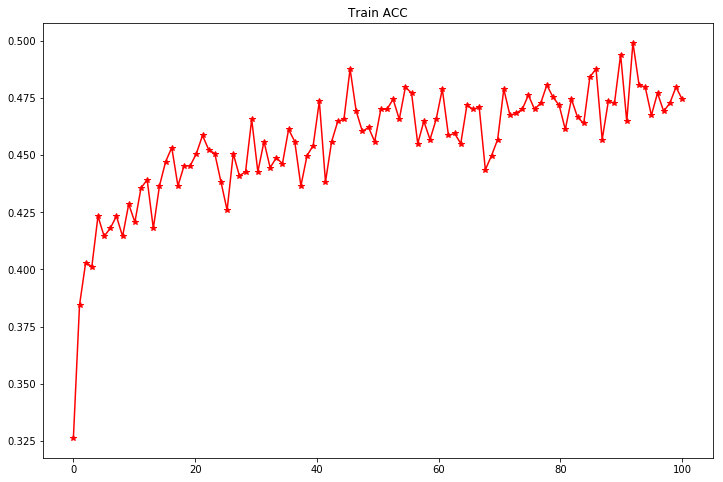

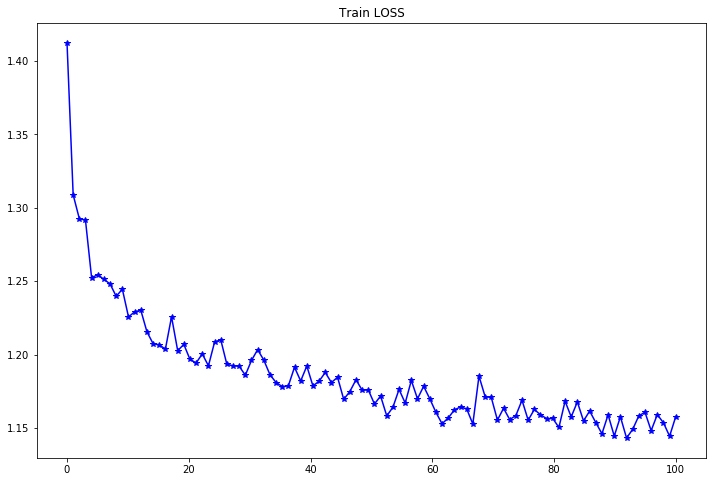

In [25]:
score = model.evaluate(test_X, test_y, batch_size=150)
print(score)
y_acc = history.history['acc']
x_acc = np.linspace(0, len(y_acc), len(y_acc))
plt.figure(figsize=(12,8))
plt.title('Train ACC')
plt.plot(x_acc, y_acc, 'r*-')
plt.show()
y_loss = history.history['loss']
x_loss = np.linspace(0, len(y_loss), len(y_loss))
plt.figure(figsize=(12,8))
plt.title('Train LOSS')
plt.plot(x_loss, y_loss,'b*-')
plt.show()

In [26]:
### Early stop Validation
# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plot_train_history(history, 'loss','val_loss')
# plt.subplot(1,2,2)
# plot_train_history(history, 'acc','val_acc')

In [27]:
model.predict(test_X)

array([[0.21989389, 0.34902543, 0.23290707, 0.1981736 ],
       [0.22776875, 0.36680984, 0.23197259, 0.17344889],
       [0.26959506, 0.19191548, 0.28460813, 0.25388134],
       ...,
       [0.32377723, 0.08062328, 0.26203415, 0.33356538],
       [0.20625909, 0.49958265, 0.24644625, 0.0477121 ],
       [0.13245651, 0.4644967 , 0.29745203, 0.10559472]], dtype=float32)

In [28]:
model.predict(train_X)

array([[0.27240852, 0.10912634, 0.2326034 , 0.38586175],
       [0.26473066, 0.10046667, 0.3646637 , 0.270139  ],
       [0.26141164, 0.138249  , 0.2531727 , 0.34716675],
       ...,
       [0.04750514, 0.8438016 , 0.08943202, 0.01926116],
       [0.27774844, 0.0779476 , 0.29138643, 0.35291755],
       [0.23182197, 0.20945229, 0.31173104, 0.24699473]], dtype=float32)

# Save Model (Keras NN model)

In [29]:
# Save Keras Model
model.save('save/NNModel.h5')


In [30]:
# Read Method -- Keras model
from keras.models import load_model
model_read = load_model('save/NNModel.h5')
score = model_read.evaluate(test_X, test_y, batch_size=200)
score

378/378 [==============================] - 0s 294us/step


[1.1529135678811049, 0.4867724956028045]